In [274]:
import pandas as pd

In [277]:
df_target =  pd.read_csv("power_consumption_g1.csv")
df_target.head()

,Datetime,PowerConsumption
0,2017-10-04 02:20:00,26802.27571
1,2017-05-28 13:20:00,32898.09836
2,2017-03-15 06:00:00,22304.68085
3,2017-10-31 11:40:00,32316.49891
4,2017-04-20 02:50:00,23982.43272


In [278]:
df_target["Datetime"] = pd.to_datetime(df_target["Datetime"])
df_target.set_index(keys=["Datetime"], inplace=True)
df_target.sort_index(inplace=True)

df_target.head()

,PowerConsumption
Datetime,
2017-01-01 00:00:00,34055.69620
2017-01-01 00:10:00,29814.68354
2017-01-01 00:20:00,29128.10127
2017-01-01 00:30:00,28228.86076
2017-01-01 00:40:00,27335.69620


In [279]:
df_features =  pd.read_csv("power_consumption_g1_feat.csv")

In [281]:
df_features["Datetime"] = pd.to_datetime(df_features["Datetime"])
df_features.set_index(keys=["Datetime"], inplace=True)
df_features.sort_index(inplace=True)

df_features.head()

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows
Datetime,,,,,
2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119
2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085
2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100
2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096
2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085


In [282]:
df = pd.merge(left=df_features, right=df_target, left_index=True, right_index=True)
df.head()

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption
Datetime,,,,,,
2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620
2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354
2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127
2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076
2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620


In [283]:
df.isnull().sum()

Temperature            559
Humidity               499
WindSpeed              529
GeneralDiffuseFlows    524
DiffuseFlows           505
PowerConsumption         0
dtype: int64

In [284]:
features = ["Temperature", "Humidity", "WindSpeed", "GeneralDiffuseFlows", "DiffuseFlows"]
target = "PowerConsumption"

In [285]:
for feature in features:
    df[feature] = df[feature].interpolate(method="time")

In [286]:
df.isnull().sum()

Temperature            0
Humidity               0
WindSpeed              0
GeneralDiffuseFlows    0
DiffuseFlows           0
PowerConsumption       0
dtype: int64

In [287]:
df = df.groupby(pd.Grouper(freq="2h")).mean()
df.head()

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption
Datetime,,,,,,
2017-01-01 00:00:00,5.866833,76.300000,0.081917,0.060167,0.105667,26927.594937
2017-01-01 02:00:00,5.029333,78.008333,0.082583,0.061417,0.135083,21447.088607
2017-01-01 04:00:00,4.919667,74.641667,0.081667,0.061917,0.120833,20641.518987
2017-01-01 06:00:00,4.512750,74.575000,0.082417,0.063583,0.122500,20094.683545
2017-01-01 08:00:00,4.632167,73.791667,0.082417,79.281917,15.761833,21255.189872


In [288]:
lags = range(4,0,-1)
list(lags)

for lag in lags:
    for column in features + [target]:
        df[f"{column}_{lag}"] = df[column].shift(lag)

df.head()

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption,Temperature_4,Humidity_4,WindSpeed_4,GeneralDiffuseFlows_4,...,WindSpeed_2,GeneralDiffuseFlows_2,DiffuseFlows_2,PowerConsumption_2,Temperature_1,Humidity_1,WindSpeed_1,GeneralDiffuseFlows_1,DiffuseFlows_1,PowerConsumption_1
Datetime,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,5.866833,76.300000,0.081917,0.060167,0.105667,26927.594937,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01 02:00:00,5.029333,78.008333,0.082583,0.061417,0.135083,21447.088607,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5.866833,76.300000,0.081917,0.060167,0.105667,26927.594937
2017-01-01 04:00:00,4.919667,74.641667,0.081667,0.061917,0.120833,20641.518987,NaN,NaN,NaN,NaN,...,0.081917,0.060167,0.105667,26927.594937,5.029333,78.008333,0.082583,0.061417,0.135083,21447.088607
2017-01-01 06:00:00,4.512750,74.575000,0.082417,0.063583,0.122500,20094.683545,NaN,NaN,NaN,NaN,...,0.082583,0.061417,0.135083,21447.088607,4.919667,74.641667,0.081667,0.061917,0.120833,20641.518987
2017-01-01 08:00:00,4.632167,73.791667,0.082417,79.281917,15.761833,21255.189872,5.866833,76.3,0.081917,0.060167,...,0.081667,0.061917,0.120833,20641.518987,4.512750,74.575000,0.082417,0.063583,0.122500,20094.683545


In [289]:
df.dropna(axis=0, inplace=True)

In [290]:
df.drop(columns=features, inplace=True)

In [291]:
X, y = df.drop(columns=["PowerConsumption"]), df["PowerConsumption"].values

In [292]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, shuffle=False)
train_X, val_X, train_y, val_y = train_test_split(train_X, train_y, test_size=0.2, shuffle=False)

In [293]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_X = scaler.fit_transform(train_X)
val_X = scaler.transform(val_X)
test_X = scaler.transform(test_X)

In [294]:
lag= 4

train_X = train_X.reshape(train_X.shape[0], lag, (train_X.shape[1] // lag))
val_X = val_X.reshape(val_X.shape[0], lag, (val_X.shape[1] // lag))
test_X = test_X.reshape(test_X.shape[0], lag, (test_X.shape[1] // lag))

In [295]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

from sklearn.metrics import (
    mean_absolute_error,
    mean_absolute_percentage_error,
    mean_squared_error,
    root_mean_squared_error,
    r2_score,
)

In [296]:
train_X = torch.tensor(train_X, dtype=torch.float32)
train_y = torch.tensor(train_y, dtype=torch.float32)

val_X = torch.tensor(val_X, dtype=torch.float32)
val_y = torch.tensor(val_y, dtype=torch.float32)

test_X = torch.tensor(test_X, dtype=torch.float32)
test_y = torch.tensor(test_y, dtype=torch.float32)

In [297]:

train_dataset = TensorDataset(train_X, train_y)
val_dataset = TensorDataset(val_X, val_y)
test_dataset = TensorDataset(test_X, test_y)

In [298]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=False)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [299]:
class CNNRegressor(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Conv1d(6, 64, kernel_size=2),
            nn.ReLU(),
            nn.Conv1d(64, 128, kernel_size=2),
            nn.ReLU(),
            nn.AdaptiveAvgPool1d(1),
            nn.Flatten(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 1)
        )

    def forward(self, x):
        x = x.permute(0, 2, 1)
        return self.net(x)

In [300]:
model = CNNRegressor()

In [301]:
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

In [302]:
def train(model, dataloader, loss_fn, optimizer):
    model.train()

    total_loss = 0
    for features, targets in dataloader:
        features, targets = features, targets

        optimizer.zero_grad()

        outputs = model(features).squeeze(-1)
        loss = loss_fn(outputs, targets)

        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    return total_loss

In [303]:
def evaluate(model, dataloader, loss_fn):
    model.eval()

    total_loss, predictions = 0, []
    with torch.no_grad():
        for features, targets in dataloader:
            features, targets = features, targets

            outputs = model(features).squeeze(-1)
            loss = loss_fn(outputs, targets)

            predictions.extend(outputs.tolist())

            total_loss += loss.item()

    return total_loss, predictions

In [304]:
num_epochs = 350

In [305]:
def train_and_evaluate(model, train_loader, val_loader, loss_fn, optimizer, num_epochs):
    train_losses, val_losses = [], []
    for epoch in range(1, num_epochs + 1):
        train_loss = train(model, train_loader, loss_fn, optimizer)
        train_losses.append(train_loss)
        val_loss, pred_y = evaluate(model, val_loader, loss_fn)
        val_losses.append(val_loss)

        mape = mean_absolute_percentage_error(val_y.tolist(), pred_y)

        if epoch % 50 == 0:
            print(f"Epoch {epoch:3d}/{num_epochs} | train_loss={train_loss:.4f} val_loss={val_loss:.4f} mape={mape:.4f}")

    return train_losses, val_losses

In [306]:
train_losses, val_losses = train_and_evaluate(model, train_loader, val_loader, loss_fn, optimizer, num_epochs)

Epoch  50/350 | train_loss=1172781887.0000 val_loss=331872237.0000 mape=0.0879
Epoch 100/350 | train_loss=828658412.5000 val_loss=253083134.5000 mape=0.0728
Epoch 150/350 | train_loss=653254074.0000 val_loss=208771566.2500 mape=0.0657
Epoch 200/350 | train_loss=585429942.0000 val_loss=191913139.0000 mape=0.0648
Epoch 250/350 | train_loss=535960522.7500 val_loss=180190538.5000 mape=0.0641
Epoch 300/350 | train_loss=488144217.2500 val_loss=166751137.7500 mape=0.0624
Epoch 350/350 | train_loss=436232620.6250 val_loss=152656314.7500 mape=0.0608


In [307]:
import seaborn as sns

<Axes: >

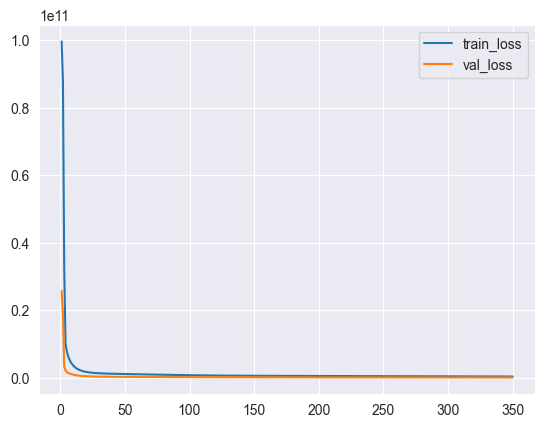

In [308]:
sns.lineplot(x=range(1, num_epochs + 1), y=train_losses, label="train_loss")
sns.lineplot(x=range(1, num_epochs + 1), y=val_losses, label="val_loss")

In [309]:
test_loss, pred_y = evaluate(model, test_loader, loss_fn)

In [310]:
print(f"MAE: {mean_absolute_error(test_y, pred_y)}")
print(f"MAPE: {mean_absolute_percentage_error(test_y, pred_y)}")
print(f"MSE: {mean_squared_error(test_y, pred_y)}")
print(f"RMSE: {root_mean_squared_error(test_y, pred_y)}")
print(f"R2 Score: {r2_score(test_y, pred_y)}")

MAE: 1865.2386474609375
MAPE: 0.06503384560346603
MSE: 5999775.5
RMSE: 2449.44384765625
R2 Score: 0.832244873046875
